# 📊 Descriptive Statistics: A Practical Guide

**Descriptive statistics are statistical tools used to summarize, organize, and simplify data. They help us understand the basic features of a dataset without making conclusions beyond the data itself.**

These statistics describe:
- Central tendency (e.g., mean, median, mode) — where the center of the data lies
- Dispersion (e.g., range, standard deviation, variance) — how spread out the data is
- Distribution shape (e.g., skewness, kurtosis)
- Descriptive statistics are the foundation of data analysis, offering quick insights before applying more advanced techniques.



## 1. Dataset Overview
**We'll simulate a dataset representing the exam scores of 100 students.**

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [30]:
# Set seed for reproducibility
np.random.seed(42)

# Simulate scores (out of 100)
scores = np.random.normal(loc=75, scale=10, size=100)

# Round scores to whole numbers
scores = np.round(scores).astype(int)

# Create DataFrame
df = pd.DataFrame({'Exam Score': scores})
df.head()

,Exam Score
0,80
1,74
2,81
3,90
4,73


## 2. Measures of Central Tendency
**Measures of Central Tendency are statistical values that describe the center or typical value of a dataset.They provide a single value that represents a set of data by identifying the middle point or the most common value. The most common measures include:**
- Mean: The arithmetic average of all values
- Median: The middle value when the data is ordered.
- Mode: The most frequently occurring value(s) in the dataset.

These measures help summarize data by indicating where most values tend to cluster.

In [43]:
metrics = {
    'Mean': df['Exam Score'].mean,
    'Median': df['Exam Score'].median,
    'Mode': lambda: ', '.join(map(str, df['Exam Score'].mode().values))
}

for name, func in metrics.items():
    print(f"{name}: {func()}")


Mean: 73.98
Median: 74.0
Mode: 70


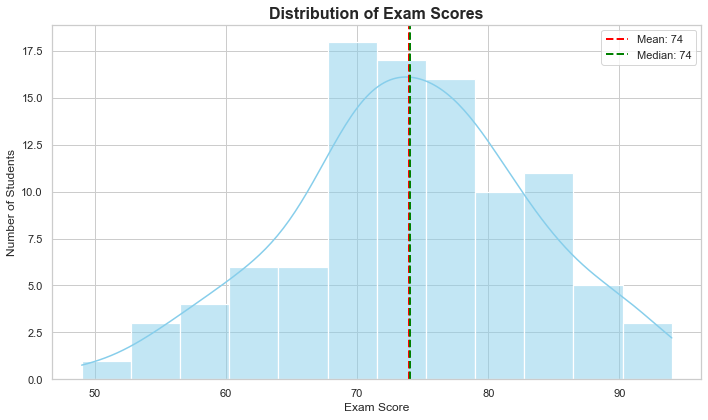

In [44]:
# Calculate mean and median
mean_score = df['Exam Score'].mean()
median_score = df['Exam Score'].median()

# Set style and font
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 12})

# Plot histogram with KDE
sns.histplot(df['Exam Score'], bins=12, kde=True, color='skyblue', edgecolor='white', linewidth=1.2)

# Mean and median lines
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.0f}')
plt.axvline(median_score, color='green', linestyle='--', linewidth=2, label=f'Median: {median_score:.0f}')

# Titles and labels
plt.title('Distribution of Exam Scores', fontsize=16, fontweight='bold')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.legend()
plt.tight_layout()
plt.show()

**On the chart, we can see the classic bell-shaped curve that characterizes a normal distribution, with the mean and median lines nearly overlapping. However, in real-world data, distributions often exhibit skewness. Skewness measures the asymmetry of a distribution around its mean. A skewness close to zero indicates a roughly normal (symmetric) distribution, like in this example of exam scores.**

There are two types of skewness:
- Positive skew (right-skewed): The tail is longer on the right side, meaning more values are concentrated on the lower end with some extreme high values.
- Negative skew (left-skewed): The tail is longer on the left side, with most values higher but some extreme low values.

Understanding skewness helps identify whether data is symmetrically distributed or biased toward one tail, which influences statistical analysis and modeling.

## 3. Measures of Dispersion
**Measures of Dispersion describe the spread or variability of a dataset. They quantify how much the data points differ from the central value (such as the mean) and from each other. Common measures of dispersion include range, variance, standard deviation, and interquartile range (IQR). Understanding dispersion helps assess the consistency, reliability, and diversity within the data.**

In [49]:
# Calculate dispersion metrics
range_score = df['Exam Score'].max() - df['Exam Score'].min()
var_score = df['Exam Score'].var()
std_score = df['Exam Score'].std()

# Display results with brief explanations
print(f"Range: {range_score:.2f} — Difference between max and min values.")
print(f"Variance: {var_score:.2f} — Average squared deviation from the mean.")
print(f"Standard Deviation: {std_score:.2f} — Square root of variance, in original scale.")


Range: 45.00 — Difference between max and min values.
Variance: 82.95 — Average squared deviation from the mean.
Standard Deviation: 9.11 — Square root of variance, in original scale.


In [51]:
# Full summary of descriptive statistics
print("Summary Statistics:\n")
df.describe().T.round(2)

Summary Statistics:



,count,mean,std,min,25%,50%,75%,max
Exam Score,100.0,73.98,9.11,49.0,69.0,74.0,79.25,94.0


**Interquartile Range (IQR)** measures the spread of the middle 50% of a dataset.  
It’s the difference between the 75th percentile (Q3) and the 25th percentile (Q1):
- It **ignores outliers**, making it a better measure of spread for skewed data.
- Commonly used in **boxplots** and for **outlier detection**.

In [52]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Exam Score'].quantile(0.25)
Q3 = df['Exam Score'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")


Q1 (25th percentile): 69.0
Q3 (75th percentile): 79.25
IQR (Interquartile Range): 10.25


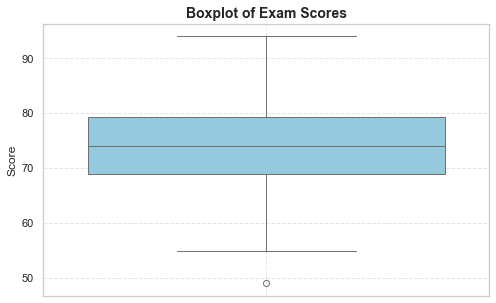

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='Exam Score', color='skyblue')

plt.title('Boxplot of Exam Scores', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Key Takeaways
- Mean, median, and mode give different views of central tendency.
- Range, variance, and standard deviation describe spread.
- Visualizations enhance interpretability.
- Descriptive stats are the first step in any data analysis!

## 🎥 Additional Learning Resources

- [Descriptive Statistics: FULL Tutorial - Mean, Median, Mode, Variance & SD (With Examples)](https://www.youtube.com/watch?v=SplCk-t1BeA)
- [Descriptive Statistics. Simply explained](https://www.youtube.com/watch?v=FzujIYo9GYo)